# Advanced Classification Predict - AE6

##### Team Mates: Khuliso Muleka, Sbusiso Phakathi, Shanice Pillay and Seromo Podile

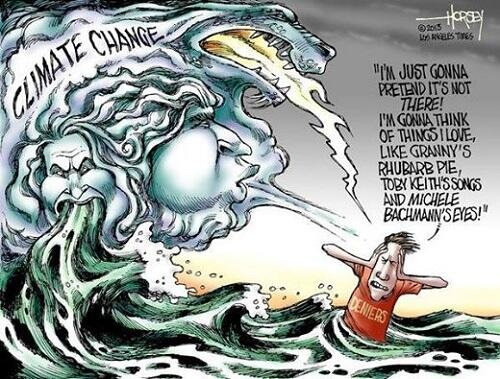!

# Table of Contents

1. Introduction
2. Problem Statement
3. Data Preprocessing and Cleaning
4. Explanatory Data Analysis
5. Building models with unsampled data
6. Unbalanced data
7. Conclusion

# 1. Introduction

Climate change is defined as a change in global climate patterns and attributed largely to the increased levels of atmospheric carbon dioxide produced by the use of fossil fuels. Such Changes could be manifested in form of change in precipitation , temperature and wind magnitudes.

As a result of the harsh aftermath created by climate change, more public and private corporations are working together to try and reduce the negative effects of climate change. Thus global sustainability and more environmentally- friendly projects are being favored. The task at the hand is to determine whether consumers see climate change as a real threat or not, in order to better understand that their target audience perspective on business product and services. 

In this notebook, we will be analyzing Twitter datasets using Machine learning Classification models.

# 2. Problem Statement


Build a machine learning classification model that determines whether or not a person believes in climate change or not based on their tweet.

# 3. Data Preprocessing and Cleaning 

## 3.1 Dataset 

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

### Sentiment Description

2 - News: the tweet links to factual news about climate change 

1 - Pro: the tweet supports the belief of man-made climate change

0 - Neutral: the tweet neither supports nor refutes the belief of man-made climate change 

-1 - Anti: the tweet does not believe in man-made climate change 

### Variable Definitions


*   sentiment: Sentiment or class of tweet
*   message: Tweet text
*   tweetid: Twitter unique id code


## 3.2 Importing python libraries 

Python Libraries important functions that lessen the need for writing codes from scratch. There are multiple python libraries that exist and each function plays a vital role in developing machine learning, data science, data visualization, image and data manipulation applications. 

We will be using the below mentioned libraries.

In [1]:
# storing and analysis
import numpy as np
import pandas as pd
import re

# visualization
import matplotlib.pyplot as plt
import warnings
import nltk
import string
import seaborn as sns

#import text classification modules
import os
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

from nltk.stem.porter import * 
from wordcloud import WordCloud
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

# import train/test split module
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# import scoring metrice
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# suppress cell warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 3.3 Load the dataset

We will be working with two datasets:
- train dataset
- test dataset

In [44]:
#Load the training set and testing set
train = pd.read_csv('train.csv') 
test = pd.read_csv('test_with_no_labels.csv') 
hashtag = pd.read_csv('train.csv') 

In [3]:
#display first 5 entries of the train data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
#Display the first 5 entries of the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


Through displaying the first 5 rows of the test and training data, we can already determine that there exists a lot of characters in the tweets will be deemed useless in the dataset. A further preprocesing of the dataset will get rid of the very common words, punctuation and more that can deem it difficult to train the model

In [5]:
#Print out the Shape of the training data and the testing data
print('Shape of Train Dataset:',train.shape)
print('Shape of Test Dataset:',test.shape)

Shape of Train Dataset: (15819, 3)
Shape of Test Dataset: (10546, 2)


The shape print out indicates that the train dataset has 15819 rows with 3 features, while the shape of the testing data indicates 10546 rows with 2 features. This makes sense. The training data contains our target variable, while the testing data will need a predicted target variable imputed in its dataset

In [6]:
#Use the value_counts() method to displace the count of each sentiment in the training dataset
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Sentiment of class 1 seems to have the vast majority of the counts, with a total of 8530, with class 2, 0 and -1 having a 9640,2353, and 1296 value count respectively. This indicates that the data of class 1 far outweights that of the rest of the class, with class -1 having a significantly lower value count. This indicates that we may be dealing with class imbalance. Further investigation will support the hypothesis made

In [7]:
#Use the isnull() method to check for null values in training data
#.sum() method evaluates the total of each column of null values
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

The training data set seems not to have any null values. This allows us to further preprocess the data to generate sufficient features for training the models

## 3.4 Data Preprocessing

In [8]:
#Combining both train and test data set before data cleaning as tweets in both the data set is unstructured
data = train.append(test, ignore_index=True) 


Before we perform sentiment analysis correctly, we need to preprocess and clean the original dataset first. Once we have performed data cleaning, we will move on to tokenize and stem every tweet, before we begin the exploratory data analysis phase.

We will perform the following data preprocessing techniques:
- remove twitter handles or mentions
- remove retweets and convert letters to lower case
- remove punctuation, special characters and numbers
- remove words less than 3 letters

### 3.4.1 Remove Twitter Handles or Mentions

Twitter handles or mentions are masked as @user due to concerns surrounding privacy. These twitter handles hardly give any information about the nature of the tweet therefore we remove them. 

### 3.4.2 Remove with Retweets and Convert Letters to Lower Case

A Retweet is a reshare of another twitter user's original tweet and starts with the RT with the original tweets in qoutes. Retweets do hold a significance in dataset as people who reshare other users tweets generally agree with that tweet statement. We will convert the tweets to lower case to analyse our data better and gain more insights.

### 3.4.3 Remove Punctuation, Special Characters and Numbers

Punctuation, special characters and numbers do influence the sentiment of a tweet. We will thus remove these from the tweet dataset

### 3.4.4 Removing short words

Words that have less than 3 letters generally do not contribute any value to the sentiment. Words like 'ohh' and 'lol' are unhelpful in sentiment analysis and will be removed.

In [9]:
def TweetCleaner(tweet):
   
    # Convert to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions or twitter handles   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)                  
    
    return tweet

# Clean the tweets in the message column
data['message'] = data['message'].apply(TweetCleaner)
data['message'] = data['message'].apply(TweetCleaner)

data.head()

,sentiment,message,tweetid
0,1.0,polyscimajor epa chief doesn t think carbon di...,625221
1,1.0,it s not like we lack evidence of anthropogeni...,126103
2,2.0,rt researchers say we have three years to act...,698562
3,1.0,wired was a pivotal year in the war on clima...,573736
4,1.0,rt it s and a racist sexist climate change d...,466954


### 3.4.8 Tokenization

Tokenization is the process of substituting a sensitive data element with a non-sensitive equivalent, referred to as a token, that has no extrinsic or exploitable meaning or value. The token is a reference (i.e. identifier) that maps back to the sensitive data through a tokenization system.

Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. A token is a part of a word or a sentence or a paragraph.

In [12]:
#Use tokenization to the words into a list of tokens 
tokenized_tweet = data['message'].apply(lambda x: x.split()) 
tokenized_tweet.head()

0    [polyscimajor, epa, chief, doesn, t, think, ca...
1    [it, s, not, like, we, lack, evidence, of, ant...
2    [rt, researchers, say, we, have, three, years,...
3    [wired, was, a, pivotal, year, in, the, war, o...
4    [rt, it, s, and, a, racist, sexist, climate, c...
Name: message, dtype: object

### 3.4.9 Stemming

Stemming is the technique of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

Stemming is a rule-based process of stripping the suffixes from a word.The goal is to remove word affixes (particularly suffixes) that modify meaning. It returns words in their root form and for ease of reference and understanding.

In [14]:
#Use PorterStemmer() to strip suffixes from the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer() 

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_tweet.head()

0    [polyscimajor, epa, chief, doesn, t, think, ca...
1    [it, s, not, like, we, lack, evid, of, anthrop...
2    [rt, research, say, we, have, three, year, to,...
3    [wire, wa, a, pivot, year, in, the, war, on, c...
4    [rt, it, s, and, a, racist, sexist, climat, ch...
Name: message, dtype: object

In [15]:
# bring the words back together 
for i in range(len(tokenized_tweet)): 
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) 

data['message'] = tokenized_tweet 

# 4. Explanatory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

## 4.1 Sentiment Analysis

We will now split the data back to training set and test set in order to get the overall sentiment on climate change around the tweets we have in our training data

In [16]:
#Split the dataset back to the training set and the testing set
train = data[:len(train)] 
test = data[len(test):]  

In [17]:
#Check the number of rows and columns in the dataset
train.shape

(15819, 3)

Data has been cleaned in the 'message' feature.

### 4.1.1 Frequency distribution of sentiments

We will examine the amount of tweets each sentiment contains. 

In [18]:
#The frequency values of the individual sentiments
train['sentiment'].value_counts() 

 1.0    8530
 2.0    3640
 0.0    2353
-1.0    1296
Name: sentiment, dtype: int64

From the above we can see that data is extremely unevenly distributed. The strongest sentiment is the pro (1) climate change sentiment whereas the weakest sentiment is the anti (-1) climate change sentiment. 

The unbalanced data may change the performance of the classification model. Deeper analysis on each sentiment will need to be done to make final conclusions. 

### 4.1.2 Barplot

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. We will create a visualization with the 4 sentiments below. 

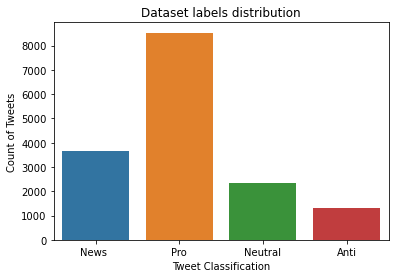

In [19]:
#Create a barplot for the train dataset classes
News = train['sentiment'].value_counts()[2] 
Pro= train['sentiment'].value_counts()[1]   
Neutral=train['sentiment'].value_counts()[0]
Anti=train['sentiment'].value_counts()[-1]  

sns.barplot(['News ','Pro','Neutral','Anti'],[News,Pro,Neutral,Anti])
plt.xlabel('Tweet Classification') 
plt.ylabel('Count of Tweets')     
plt.title('Dataset labels distribution') 
plt.show() 

Conclusion:
Class 1 represents the biggest plot being the Pro Climate Change Sentiment of the dataset. 
Only a small margin of the data has a negative sentiment towards climate change.
Neutral tweets are the third biggest sentiment with News being the second largest sentiment. This includes a lot of news tweets from news twitter accounts and jounalists.


### 4.1.4 ViolinPlot

A violinplot is a method of ploting numerical data. It is similar to the boxplot with the addition of a rotated kernel density plot on each side. We will make a violin plot to display the distribution of the length of the tweets for each class in the training set

Text(0.5, 0, 'Sentiment Class')

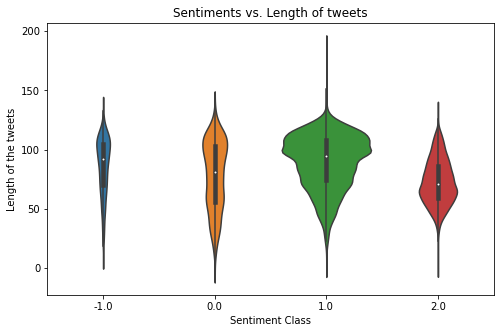

In [21]:
#create a new length value column that contains the lengths of the messages
train['message_length'] = train['message'].apply(len)

#Create a violinplot of the dataset
plt.figure(figsize=(8,5)) #Set the figsize to 8 and 5 respectively
plt.title('Sentiments vs. Length of tweets') #Add the title of the violin plot
sns.violinplot(x='sentiment', y='message_length', data=train,scale='count') #Add the dimentions of the violin plot
plt.ylabel("Length of the tweets") #Y_lable of the plot
plt.xlabel("Sentiment Class") #X_label of the plot

The facetgrid indicates the tweet length accross all sentiments are destributed around the 50-150 character length. All sentiments having a vast majority of the tweets being in that 100-150 range, indicating that most tweets are generally about climate change are longer in length. People sharing an experience or their thoughs around climate change

In [22]:
#Use groupby in order to numerically display what the boxplot is trying to show to the user
train['message_length'].groupby(train['sentiment']).describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
-1.0,1296.0,86.058642,24.148120,11.0,70.0,92.0,105.0,133.0
0.0,2353.0,78.153421,28.750226,0.0,56.0,81.0,103.0,137.0
1.0,8530.0,89.730832,22.953587,0.0,74.0,95.0,108.0,189.0
2.0,3640.0,72.850549,19.070909,0.0,59.0,71.0,86.0,133.0


* Negative sentiments have most of their tweets between 114 and 140 with an average 123.7 length size of the tweets
* Neutral has an interquartile range around the 85 and 139 length, meaning neutral tweets very the most, which is confirmed by the largest standard deviation (std) of 32.36 as compared to the rest of the dataset
* Positive class has a intequartile range of 123 to 137, meaning most positive tweets are longer in length. The standard deviation is at 19.9, which is one of the shorter ones in the dataset meaning there is less variance
* News tweets have an interquartile range of 108 to 137 and has the smallest standard deviation of 19

## 4.2 Frequent words

### 4.2.1 Word cloud

We will look at the sentiment distribution of the train dataset by analyzing the common words using wordcloud visualization tools.

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [25]:
#Create strings for each class
positive_words =' '.join([text for text in data['message'][data['sentiment'] == 1]]) #Words in the positve class
negative_words = ' '.join([text for text in data['message'][data['sentiment'] == -1]]) #Words in negative class
normal_words =' '.join([text for text in data['message'][data['sentiment'] == 0]]) #Words in the neutral class
news_words =' '.join([text for text in data['message'][data['sentiment'] == 2]]) #Words in the news class

In [74]:
#Create a user defined function to display a word cloud for each class
def word_cloud(class_words):
   
    wordcloud = WordCloud(background_color='white',width=800, height=500, random_state=21, max_font_size=110).generate(class_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Most Common positive words")
    plt.axis('off')
    return plt.show()

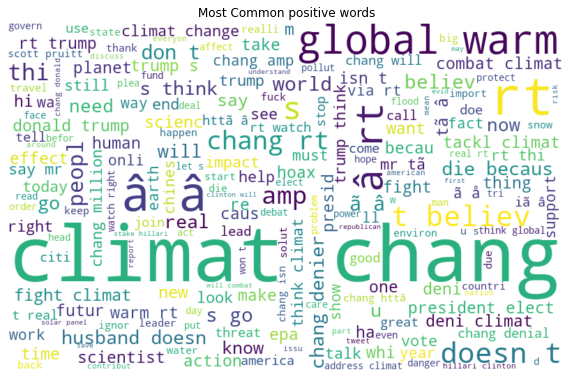

In [75]:
#Visualise all words from the positive class
word_cloud(positive_words)

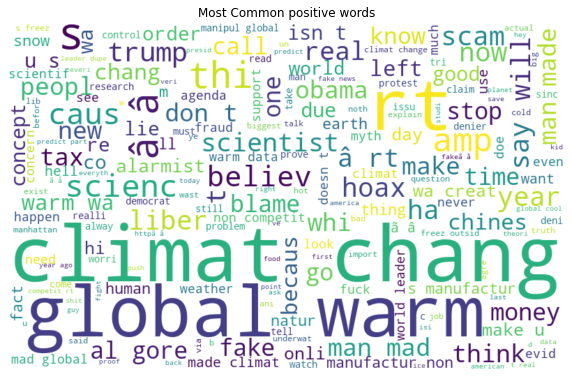

In [76]:
#Visualise all words from the negative class class
word_cloud(negative_words)

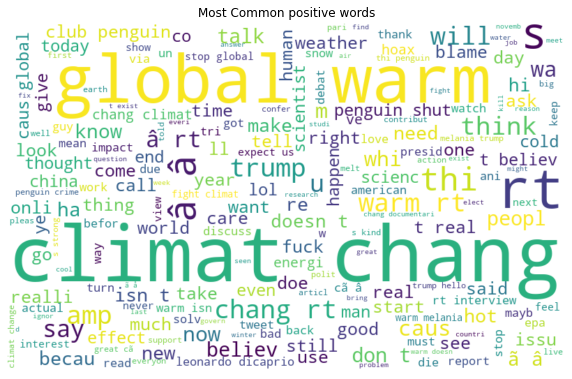

In [77]:
#Visualise all words from the neutral class
word_cloud(normal_words)

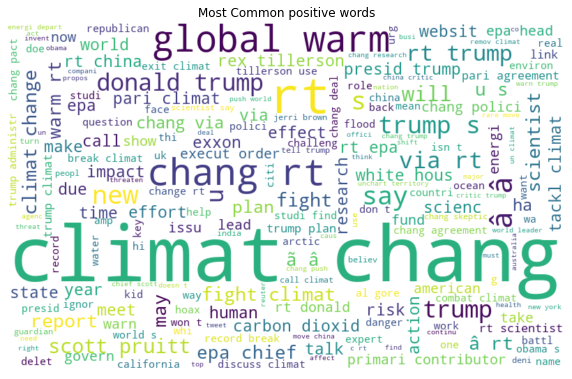

In [78]:
#Visualise all words from the news class
word_cloud(news_words)

*Pro* - The wordcloud suggests that most positive sentiments are global warming, climate change, believe climate, change real, tackle and the likes depicted in the wordcloud. A strong call for action, to fight climate change by a vast majority of the tweets and a vast majority of people tweeting to others to plea the reality of climate change.  'http' appears frequently as well indicating a lot of links present.

*Anti* - Most key words in the negative sentiments are very political and scientific, indicating words said by world leaders on the topic of climate change. Trump, a firm anti climate change individual is appearing very significantly, including the terms scientist, made, fake, alarmist which shows either a lot of people not believing that is real on a hunch or because of a lack of scientific evidence to support the claims. Words like scam, money, man-made indicate one of the reasons they may not really believe climate change.

*Neutral* - Topics around the effects on climate change as seen with words like 'talk','debate','report'. They are speaking about the penguins which are indangered due to the effects of climate change. They speak about the climate, weather, warm, polar bear. There also appears to be http, which suggests a lot of neutral tweets may have a link to an articles or journals.


*News* - Donald Trump and his views on climate change appear a lot here. They also report a vast majority of issues all included in the analysis of the other words included. US Administrator of Environmental Affairs is appearing regularly as well. There also is an 'http', which shows that news tweets may have a link to a news report. The word cloud is also indicating that the words are well distributed and spoken of almost similarly. Most of the words are not frequently requiring except 'Climate Change', 'Change HTTP', 'Warm HTTP', which are linked to tweets having links, and the main topic being thatn of global warming and climate change

## 4.2.2 Hashtag analysis

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments. The tweet seems positive in nature and the hashtags in the tweet convey the same feeling.

In [45]:
#Create a function to collect hashtags
def hashtag_extract(x):
    
    hashtags = [] 
    for i in x:   
        ht = re.findall(r"#(\w+)", i) 
        hashtags.append(ht)

    return hashtags

In [46]:
# extracting hashtags from the news
HT_news = hashtag_extract(hashtag['message'][hashtag['sentiment'] == 2])
# extracting hashtags from positive sentiments
HT_positive = hashtag_extract(hashtag['message'][hashtag['sentiment'] == 1])
# extract hashtags from neutral sentiments
HT_normal = hashtag_extract(hashtag['message'][hashtag['sentiment'] == 0])
# extracting hashtags from negative sentiments
HT_negative = hashtag_extract(hashtag['message'][hashtag['sentiment'] == -1])

# unnesting list of all sentiments
HT_news = sum(HT_news,[])
HT_positive = sum(HT_positive,[])
HT_normal = sum(HT_normal,[])
HT_negative = sum(HT_negative,[])

We will now create a frequency distribution of the top 10 hashtags for each of the individual classes to see what each hashtag represent for each class

In [47]:
#Create a function that visualises the barplot distribution of the hashtags
def bar_dist(x):
    
    a = nltk.FreqDist(x) 
    d = pd.DataFrame({'Hashtag': list(a.keys()), 
                  'Count': list(a.values())})  
    d = d.nlargest(columns="Count", n = 10)  
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
    ax.set(ylabel = 'Count') 
    return plt.show()

### 4.2.2.1 News

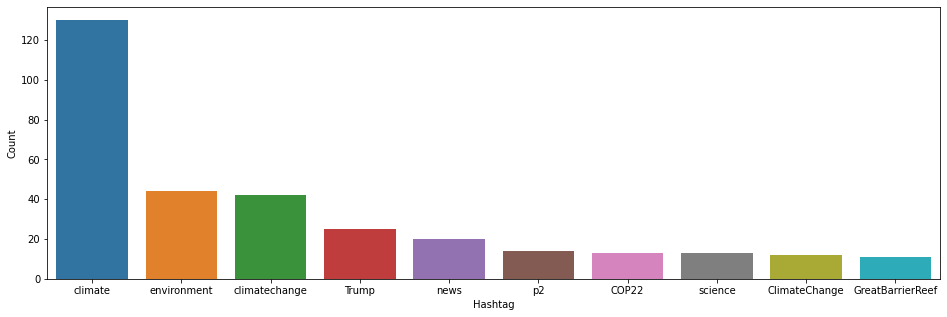

In [49]:
#Display barplot of the News hastags
bar_dist(HT_news)

As expected, the news is reporting on a vast nature of stories, mostly around the climate, climate change and the environment. Political events like Trump, congress of Parties (COP), Paris Agreements are also covered

### 4.2.2.2 Positive hashtags

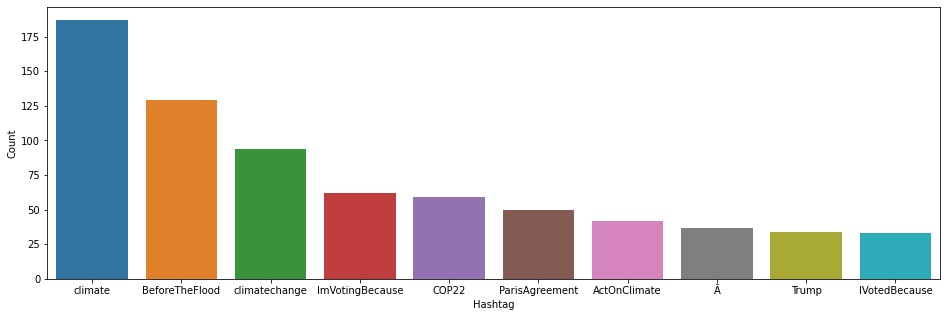

In [50]:
#Display barplot of the positive hastags
bar_dist(HT_positive)

We find an interesting understanding from this graph. As expected climate is the number one positive key hashtags but what is interesting is number 2, and why Leonardo diCaprio was mentioned on the Wordcloud. Before The Flood is a documentary starring actor Leonardo diCaprio spealing with a lot of activists, scientists and world leaders to discuss climate change and possible solutions. It has clearly had a fantasic response to viewers who have expressed positive feedbank, which proves our assumption that a lot of people need more research and knowledge to believe climate change since seeing is believing. Organisations globally can get involved in similar initiatives which can change the sentiment around climate change. The rest of the positive hashtags come from tweeting about the Conference of Parties (cop) which is a mkeeting by the United nations to discuss climate change.

### 4.2.2.3 Neutral hashtags

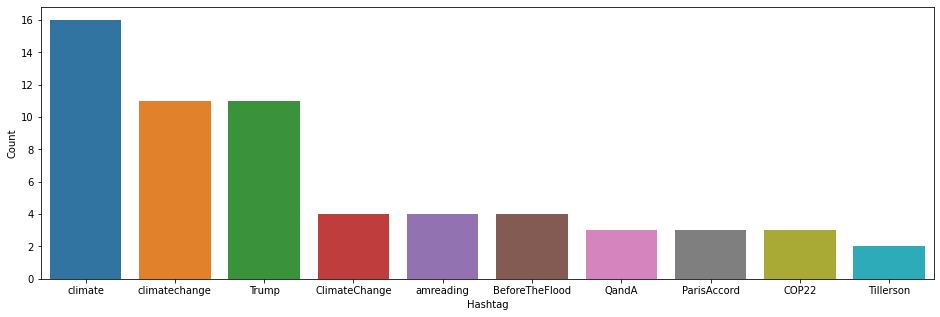

In [51]:
#Display barplot of the neutral hastags
bar_dist(HT_normal)

Climate change and climate are again top of the list, but interestingly enough we start to see the emergance of Trump tweets. Which is driving up the neutrals. We also see the Before The Flood series which our COP, which makes sense since neutrals do question a lot initially and finally the #QandA, which shows a lot of neutral sentiments in the data are questions. We do however notice that the count values of each hashtag is significantly lower than the positive hashtags and the new hashtags

### 4.2.2.4 Negative Hashtags

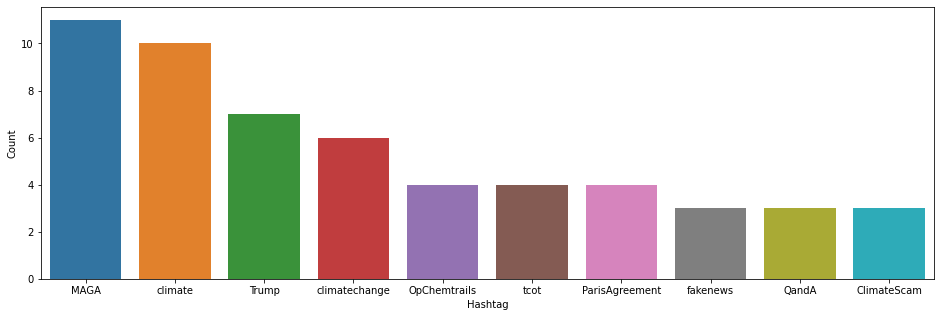

In [52]:
#Display barplot of the neutral hastags
bar_dist(HT_negative)

The number one negative sentiment from the nagative tweets comes from the Make America Great Again campaign by US President Donald Trump. Possibly this indicates all the negative sentiments he has against Climate Change.

# 5. Model Building with cleaned data

To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF vecotoriser. We will thus investigate both feature creation models and select the best model base on merits

## 5.1 Splitting the data

We need to split the data, into training features and training target variables to fit and train the model. 

In [53]:
#Splitting features and target variables
X = train['message'] 
y = train['sentiment']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12655,)
(3164,)
(12655,)
(3164,)


The X_train and y_train both have 12655 values, which is 80% of our data, and the X_test and y_test which represents out test data is being 20% of our data which will give us an indication of our accuracy

## 5.2 Feature Extraction

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict. 

## 5.2.1 TF-IDF Features

This method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [54]:
# import and call the TFidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer() 


## 5.2.2 Bag of words features

Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

In [55]:
#import CountVectorizer and call it
from sklearn.feature_extraction.text import CountVectorizer 

cf= CountVectorizer() 

## 5.3 Models using TF-IDF

In building a model using TF-IDF vectorizer we have to build a pipeline that contains both the feature extractor called in this case the TF_IDF vectorizer and fit it to a model. We will the evaluate the metrics of the data and see what could be the best performing model

In [56]:
#Import metrics from sklearn
from sklearn import metrics

### 5.3.1 Logistic Regression

Logistic Regression is a common S-shaped curve known as the logistic function. This curve is commonly known as a sigmoid. It solves the problem for the following reasons:

* It squeezes the range of output values to exist only between 0 and 1.
* It has a point of inflection, which can be used to separate the feature space into two distinct areas (one for each class).
* It has shallow gradients at both its top and bottom, which can be mapped to zeroes or ones respectively with little ambiguity.

We will add the parameter 'multi_class'='ovr' due to the class being more than binary, it has 4 classes.

In [57]:
# create a pipeline and fit it with a Logistic Regression
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(multi_class='ovr') 

clf = Pipeline([('tfidf', tfidf), ('clf', model)]) 


clf.fit(X_train, y_train) 

y_pred= clf.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test, y_pred)) 

accuracy 0.7288242730720607
f1_score 0.7031414428177769
              precision    recall  f1-score   support

          -1       0.84      0.25      0.39       278
           0       0.65      0.31      0.42       425
           1       0.73      0.88      0.80      1755
           2       0.72      0.78      0.75       706

    accuracy                           0.73      3164
   macro avg       0.74      0.56      0.59      3164
weighted avg       0.73      0.73      0.70      3164



We now have a far more comprehensive view of the performance of our model. Since we fit the model using Logistic Regression, we find that it overfits on imbalance datasets. Overall it performs well on class 1, the positive class, and a lot poorer on the other classes because positive classes are more prevailent in the dataset.

- The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

- The corresponding values in the neutral and negative class are lower.

- The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.


### 5.3.2 Linear Support Vector Classifier 

Support Vector Machines aresimilar to the logistic regression, they fit a linear decision boundary. However, unlike logistic regression, they do this in a non-proabilistic way and are able to fit to non-linear data using an algorithm known as the kernel trick. Furthermore, they can be used for both classification and regression. In sklearn, these are called SVC (Support Vector Classifier) and SVR (Support Vector Regression) respectively.

In [58]:
## create a pipeline and fit it with a Linear Support Vector Classifier
from sklearn.svm import LinearSVC 

classifier = LinearSVC() 

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) 

clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) 
print(classification_report(y_test, y_pred)) 

accuracy 0.7537926675094817
f1_score 0.7448419640599531
              precision    recall  f1-score   support

          -1       0.71      0.49      0.58       278
           0       0.60      0.43      0.50       425
           1       0.79      0.85      0.82      1755
           2       0.74      0.81      0.77       706

    accuracy                           0.75      3164
   macro avg       0.71      0.64      0.67      3164
weighted avg       0.75      0.75      0.74      3164



We now have a far more comprehensive view of the performance of our model. Since we fit the model usinglinearSVC, the issue with our imbalanced dataset. It picks up the and trains well for the dataset on the class 1 and class 2, but performs poorly on the class -1 and 0 which have less data prevailing. Overall it performs well on class 1, the positive class, and a lot poorer on the other classes because positive classes are more prevailent in the dataset. We do however see an improvement with the f1 score and recall of the smaller classes, even though it comes at a cost of the precision

The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.

Now we will use the SVC parameter kernel='rbf'. 'rbf' is a classifier for non-linear data

In [59]:
## create a pipeline and fit it with a  Support Vector Classifier
from sklearn.svm import SVC 

classifier = SVC(kernel='rbf') 

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) 

clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) 
print(classification_report(y_test, y_pred)) 

accuracy 0.7433628318584071
f1_score 0.7168566321819851
              precision    recall  f1-score   support

          -1       0.91      0.29      0.44       278
           0       0.72      0.29      0.42       425
           1       0.74      0.90      0.81      1755
           2       0.75      0.80      0.77       706

    accuracy                           0.74      3164
   macro avg       0.78      0.57      0.61      3164
weighted avg       0.75      0.74      0.72      3164



From this classifier, we can immediately appreciate that the model has a higher precision when it comes to classifing smaller dataset in the imbalance classes, although the data imbalance is cause their respective f1 scores, recall to be signigicantly lower than the news class and the positive class which takes a bigger portion of the dataset. We will investiagte how the performance will improve once we balance the data

The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.


## 5.4 Models using Bag of words

Convert a collection of text documents to a matrix of token counts
This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.
If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

### 5.4.1 Logistic regression

In [60]:
#Create a pipeline and predict the test sentiment using logistic regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(multi_class='ovr' )

text_lr= Pipeline([('cf', cf),('clf',model)])

text_lr.fit(X_train, y_train) 

y_pred = text_lr.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) 
print(classification_report(y_test, y_pred))

accuracy 0.754424778761062
f1_score 0.747910603067716
              precision    recall  f1-score   support

          -1       0.78      0.46      0.58       278
           0       0.56      0.49      0.52       425
           1       0.79      0.85      0.82      1755
           2       0.75      0.80      0.77       706

    accuracy                           0.75      3164
   macro avg       0.72      0.65      0.67      3164
weighted avg       0.75      0.75      0.75      3164



We get our best model so far. It performs around 74% accuracy and 73.37% f1-score. They seem to be very close to each other and not as spread as the other models we have attempted. Due to the class imbalance however, it is still does not perfom well to the minority classes in terms of f1 scores and the scores with the recall.
We do however have a better performing model

### 5.4.2 Linear Support Vector Classifier

In [61]:
#Create a pipeline and make predictions of the bag of words using linearSVC
from sklearn.svm import LinearSVC 

clf= Pipeline([('cf', cf),('clf',  LinearSVC())]) 

clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) 
print(classification_report(y_test, y_pred)) 

accuracy 0.7335651074589128
f1_score 0.7310981346472833
              precision    recall  f1-score   support

          -1       0.63      0.50      0.55       278
           0       0.51      0.50      0.50       425
           1       0.79      0.81      0.80      1755
           2       0.74      0.78      0.76       706

    accuracy                           0.73      3164
   macro avg       0.67      0.65      0.66      3164
weighted avg       0.73      0.73      0.73      3164



The model did not perform well compared to the previous data on all front. It is still perfoming better on majority classes yet perfoming poorly to minority classes. 


The precision, recall and f1-score values for the positive class are higher, and this has to do with the class imbalance we referred to. There are more observations with the positive label, so the model gets better at classifiying those ones because it has more evidence of them.

The corresponding values in the neutral and negative class are lower.

The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class 0 and 1, but slightly in favour of class 1, of which there were more examples.


In [62]:
## create a pipeline and fit it with a  Support Vector Classifier
from sklearn.svm import SVC  

classifier = SVC(kernel='rbf') 

clf = Pipeline([('cf', cf), ('clf', classifier)]) 

clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) 
print(classification_report(y_test, y_pred)) 

accuracy 0.7379898862199747
f1_score 0.7143010235686614
              precision    recall  f1-score   support

          -1       0.88      0.23      0.36       278
           0       0.69      0.38      0.49       425
           1       0.74      0.88      0.80      1755
           2       0.73      0.81      0.77       706

    accuracy                           0.74      3164
   macro avg       0.76      0.57      0.60      3164
weighted avg       0.74      0.74      0.71      3164



Compared to the linear SVC, the SVC with the kernel='rbf' has a better accuracy score of 72%, however the f1 score is a lot similar to the previous model

THis model performs better in locating minority classes as seen with the high precision scores for anti class and the neutral class

F1 scores and recall scores of minority class seemingly low, which might be caused again by the imbalancing of the classes.

## 6. Unbalanced data

Class imbalance exists if the data is not evenly distributed. The model is this difficult to train when there are classes that are vastly smaller than other classes. So we will look to at least have a dataset that is more evently distributed to get better results. This is called the resampling of the dataset

### 6.1 Resampling of the dataset

Resampling of the dataset can be done in one or two ways:

- **Downsampling** - taking a random subset of the majority class small enough to match the number of observations in the minority class.

- **Upsampling** - taking repeated random samples from the minority class until we have as many observations as the  majority class. This grows the size of the minority class by effectively duplicating observations at random.

For this model, we will do it for both ways

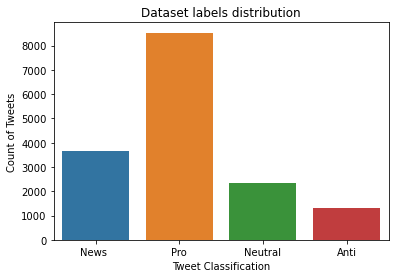

In [63]:
#Create a barplot for the train dataset classes
News = train['sentiment'].value_counts()[2] 
Pro= train['sentiment'].value_counts()[1]   
Neutral=train['sentiment'].value_counts()[0]
Anti=train['sentiment'].value_counts()[-1]  

sns.barplot(['News ','Pro','Neutral','Anti'],[News,Pro,Neutral,Anti]) 
plt.xlabel('Tweet Classification') 
plt.ylabel('Count of Tweets')      
plt.title('Dataset labels distribution') 
plt.show() 

If we refer back to this barplot, we can see that the data is not balanced. We will be looking to upscale the minority calsses which is the news class, neutral class and anti class and downsample the big majority class. we will look at different values that work the best to improve the model accurancy and f1-scores

In [64]:
#Import the resampling module
from sklearn.utils import resample

We will look to distinguish which classes are minority classes and which are majority classes and then downsample and upsample accoringly to make the classes balance

In [65]:
#Downsample and upsample train dataset
df_majority = train[train.sentiment==1] 
df_minority = train[train.sentiment==0] 
df_minority1 = train[train.sentiment==2] 
df_minority2 = train[train.sentiment==-1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=5000,     
                                 random_state=123) 
#Upsampling the least minority class
df_minority_up = resample(df_minority, 
                        replace=True,   
                        n_samples=5000,     
                        random_state=123) 

df_minority_up1 = resample(df_minority1, 
                        replace=True,    
                        n_samples=5000,     
                        random_state=123) 

df_minority_up2 = resample(df_minority2, 
                        replace=True,   
                        n_samples=5000,    
                        random_state=123) 

# Combine minority class with downsampled majority class
df_resampled = pd.concat([df_majority_downsampled,df_minority_up,df_minority_up1, df_minority_up2])
 
# Display new class counts
df_resampled.sentiment.value_counts()


 0    5000
 1    5000
 2    5000
-1    5000
Name: sentiment, dtype: int64

We have created a new balanced dataset with 5000 entries for each of the classes. We will now investigate training on the new balanced dataset

## 6.1 Splitting the resampled data

In [66]:
X = df_resampled['message']
y = df_resampled['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000,)
(4000,)
(16000,)
(4000,)


The training features seem slightly more, but more rounded since we now have a balance dataset. We will now evalue the model perfomance of the dataset

## 6.2 Model building using resampled data

## 6.2.1 Logistic Regression

### 6.2.1.1 Logistic Regression with TF-IDF features

In [67]:
# create a pipeline and fit it with a Logistic Regression
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(C=50,multi_class='ovr') 

clf_sam = Pipeline([('tfidf', tfidf), ('clf', model)]) 


clf_sam.fit(X_train, y_train)

y_pred= clf_sam.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) 
print(classification_report(y_test, y_pred)) 

accuracy 0.89275
f1_score 0.8904813522808428
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       977
           0       0.90      0.90      0.90      1024
           1       0.87      0.74      0.80       995
           2       0.87      0.95      0.91      1004

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



As predicted, balancing the dataset has lead to a significant improvement in the model. The upsampled dataset is performing way better than the model of the original dataset. However, due to downsampling of the data, we see that the pro class f1 score and recall are significantly lower want the rest of the classes

Pro class has a significantly lower f1 score now and recall score

The balance now makes it easier to make predictions on the other classes and seems to be performing much better in this regards

### 6.2.1.2 Logistic Regression with bag_of_words features

In [68]:
# create a pipeline and fit it with a Logistic Regression
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(C=100,multi_class='ovr') 

clf_sam1 = Pipeline([('cf', cf), ('clf', model)]) 


clf_sam1.fit(X_train, y_train) 

y_pred= clf_sam1.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test, y_pred))

accuracy 0.89075
f1_score 0.8885125180186983
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       977
           0       0.87      0.91      0.89      1024
           1       0.87      0.74      0.80       995
           2       0.89      0.93      0.91      1004

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



Bag of words features perfom significantly better at finding the different classes than the tf-idf vectorizer. Even for the positive class which was significantly compromised initially. The rest have significantly improved. 

Pro class is still lower in terms of f1 score and recall compared to the other classes that are near the 90% mark, which it still falls behind somewhat. We can look to tune the parameters to make it even better

### 6.2.2 Support Vector Machines

### 6.2.2.1 Linear Models

In [69]:
## create a pipeline and fit it with a Linear Support Vector Classifier
from sklearn.svm import LinearSVC 

classifier = LinearSVC()

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) 

clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) 
print(classification_report(y_test, y_pred)) 

accuracy 0.8875
f1_score 0.8847238755340536
              precision    recall  f1-score   support

          -1       0.92      0.98      0.95       977
           0       0.90      0.90      0.90      1024
           1       0.86      0.72      0.79       995
           2       0.86      0.95      0.90      1004

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.88      4000
weighted avg       0.89      0.89      0.88      4000



The model for linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

In [70]:
#Create a pipeline and make predictions of the bag of words using linearSVC
from sklearn.svm import LinearSVC 


clf= Pipeline([('cf', cf),('clf',  LinearSVC())]) 

clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test, y_pred)) 

accuracy 0.88725
f1_score 0.8847274367998845
              precision    recall  f1-score   support

          -1       0.93      0.98      0.96       977
           0       0.86      0.91      0.89      1024
           1       0.86      0.73      0.79       995
           2       0.88      0.93      0.90      1004

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.88      4000
weighted avg       0.89      0.89      0.88      4000



The model for linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### 6.2.2.2 Non-linear SVC

In [71]:
## create a pipeline and fit it with a  Support Vector Classifier
from sklearn.svm import SVC  

classifier = SVC(kernel='rbf') 

clf_rbf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) 

clf_rbf.fit(X_train, y_train) 
y_pred = clf_rbf.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) 
print(classification_report(y_test, y_pred)) 

accuracy 0.90375
f1_score 0.9031248694196684
              precision    recall  f1-score   support

          -1       0.96      0.97      0.97       977
           0       0.93      0.89      0.91      1024
           1       0.85      0.81      0.83       995
           2       0.88      0.95      0.91      1004

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



Our best model to date so far, with a 90% accuracy and 90% f1-score. The Pro sentiment seems to be perfoming much better under the rbf, unlike the with the linear SVC.
The negative sentiments are perfoming the best again, and the model seems to be efficient

In [72]:
## create a pipeline and fit it with a  Support Vector Classifier
from sklearn.svm import SVC 

classifier = SVC(kernel='rbf') 

clf_rbfc = Pipeline([('cf', cf), ('clf', classifier)]) 

clf_rbfc.fit(X_train, y_train) 
y_pred = clf_rbfc.predict(X_test) 

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) 
print(classification_report(y_test, y_pred))

accuracy 0.8735
f1_score 0.8716108353281273
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       977
           0       0.86      0.88      0.87      1024
           1       0.84      0.73      0.78       995
           2       0.85      0.94      0.89      1004

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



It is clear the countvectorizered version of the rbf is not working as ptoficiantly as the TD_IDF vectorized version.

It seems to be working poorly to the pro sentiments, while the neural and the news f1-scores and precision has significantly been reduced.

We will now take the SVC with the kernel='rbf' to make our final submission

In [73]:
# Kaggle submission
test_x = test['message'] 

y_pred = clf_rbf.predict(test_x) 

test['sentiment'] = y_pred 
test['sentiment'] = test['sentiment'].astype(int)
test[['tweetid', 'sentiment']].to_csv('final2.csv', index=False)


# 7. Conclusion

Relevant procedures were followed before machine models were built, and all these procedure have helped in having the best predictive model. The procedures, followed includes data cleaning and data preprocessing which are essential in making sure that the relevant information is conserved without unnecessary noises which could lead to unrealiable results.

Having perfomed both data cleaning and pre-processing have lead us to a conclusion that the Logistic regression model has perfomed best when the unbalance data was used,and the accuracy as well as the F1 score of the other models were close to the best performing model.

Futhermore, the data was the balanced using the both downsampling and upsampling methods, the results changed slightly from what was obtained from the unbalanced data. However the best model in this case was the logistic regression model, that was ran on an rbf kernel. We can conclude that the upsampled data gave the best results compared to the unbalanced data set.

Sentiment analysis - Pro Tweets are generally longer in length, Anti sentiment is fairly centered around politics, mostly mentioning the Trump Make America Great Again campaign, both neutral and news sentiment have high interaction with reference to scholar articles and journals. The dataset classes are imbalanced and needed to be resampled. The imbalanced dataset perfomed poorly overall, so balancing and resampling the data works much better. 

Accuracy score can be misleading when evaluating imbalanced datasets as it is not the best measure of prediction.

Given more time,the hyperparameter and the grid search would have been used and possibly we could have gotten better results.